In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel(r'C:\Users\tyagir01\Desktop\Data Analytics Problem Set\Mba_admission.xlsx')

In [3]:
df.describe() # To know the basic satistical detail of variables

,Gmat,Gpa,Work_ex,Admitted
count,40.000000,40.000000,40.000000,40.00000
mean,654.000000,3.095000,3.425000,0.50000
std,61.427464,0.631218,1.737778,0.50637
min,540.000000,1.700000,1.000000,0.00000
25%,607.500000,2.700000,2.000000,0.00000
50%,660.000000,3.300000,4.000000,0.50000
75%,690.000000,3.700000,5.000000,1.00000
max,780.000000,4.000000,6.000000,1.00000


In [4]:
df['Admitted'].unique() # Gives the unique values in the column.

array([1, 0], dtype=int64)

In [5]:
df['Admitted'].value_counts() # no of times the i=unique value is present in the column.

1    20
0    20
Name: Admitted, dtype: int64

## Building the Logistic regression model for the given dataset

In [6]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 

In [7]:
X = df[['Gmat','Gpa','Work_ex']]
y = df['Admitted']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [8]:
lgt_reg = LogisticRegression(solver = 'lbfgs')
lgt_reg.fit(X_train, y_train.ravel()) # ravel() will return 1D array with all the input-array elements

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [9]:
y_predict_train = lgt_reg.predict(X_train)
y_predict_train

array([0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

In [10]:
# to get the probability of each value in train dataset
y_prob_train = lgt_reg.predict_proba(X_train)[:,1]
y_prob_train.reshape(1,-1)

array([[5.13855748e-03, 5.04195272e-02, 3.55120980e-03, 6.98621957e-01,
        9.29864928e-01, 4.35634460e-02, 8.77841053e-01, 2.86938459e-02,
        2.51771432e-01, 9.90484482e-01, 7.65609329e-01, 9.94263547e-01,
        8.30755471e-01, 9.87930309e-01, 8.66407317e-01, 9.51003457e-01,
        6.42172781e-01, 9.89571821e-01, 6.12917557e-01, 9.86130803e-01,
        3.49995511e-02, 4.41120950e-03, 2.39840065e-01, 7.28421398e-04,
        5.02414769e-03, 1.74322040e-02, 1.97184452e-01, 2.94886072e-02,
        9.69987201e-01, 9.94191474e-01]])

In [11]:
y_predict_test = lgt_reg.predict(X_test)
y_predict_test

array([0, 0, 1, 1, 0, 0, 1, 1, 0, 1], dtype=int64)

In [12]:
y_prob_test = lgt_reg.predict_proba(X_test)[:,1]
y_prob_test

array([0.0065256 , 0.04451621, 0.91011836, 0.80754114, 0.0486211 ,
       0.01182598, 0.83075547, 0.92986493, 0.0010261 , 0.74670207])

In [13]:
# getting the regression model

import statsmodels.api as sm
x = sm.add_constant(X)
logit_model = sm.Logit(y,x).fit()
print(logit_model.summary())

Optimization terminated successfully.
         Current function value: 0.282234
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               Admitted   No. Observations:                   40
Model:                          Logit   Df Residuals:                       36
Method:                           MLE   Df Model:                            3
Date:                Thu, 02 Jul 2020   Pseudo R-squ.:                  0.5928
Time:                        17:03:57   Log-Likelihood:                -11.289
converged:                       True   LL-Null:                       -27.726
Covariance Type:            nonrobust   LLR p-value:                 3.426e-07
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -23.6879      9.059     -2.615      0.009     -41.443      -5.933
Gmat           0.0281      0.

In [14]:
# Now check the accuracy of model
import sklearn.metrics as skm
from sklearn.metrics import accuracy_score
acc_scr = skm.accuracy_score(y_test, y_predict_test)
acc_scr

0.8

In [15]:
# Now construction a Confusion Matrix

import sklearn.metrics as skm
skm.confusion_matrix(y_test, y_predict_test)

array([[4, 1],
       [1, 4]], dtype=int64)

Accuracy:  0.8


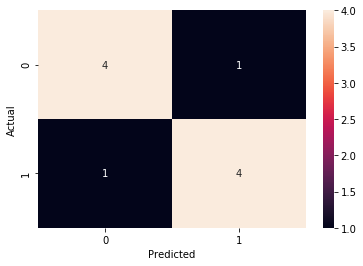

In [16]:
# another method of displaying the confusion matrix

import seaborn as sb
confusion_matrix = pd.crosstab(y_test, y_predict_test, rownames=['Actual'], colnames=['Predicted'])
sb.heatmap(confusion_matrix, annot=True)

print('Accuracy: ',skm.accuracy_score(y_test, y_predict_test))
plt.show()

In [17]:
tn, fp, fn, tp = skm.confusion_matrix(y_test, y_predict_test).ravel()
print("True Negatives:", tn)
print("False Positives:", fp)
print("False Negatives:", fn)
print("True Positives", tp)

True Negatives: 4
False Positives: 1
False Negatives: 1
True Positives 4


In [18]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict_test))

# recall tells how many times we have predicted correctly when it is actually 'YES' or '1'

# precision tells us how many times we predicted "Yes" or "1" correctly out of total predicted "Yes".

# f-measure is the Harmonic mean of precison & recall

              precision    recall  f1-score   support

           0       0.80      0.80      0.80         5
           1       0.80      0.80      0.80         5

    accuracy                           0.80        10
   macro avg       0.80      0.80      0.80        10
weighted avg       0.80      0.80      0.80        10



In [19]:
# true positive rate - Sensitivity
sensitivity = tp/(tp+fn)
print("Sensitivity:", sensitivity)

Sensitivity: 0.8


In [20]:
# true negative rate -  Specificity
spf = tn/(tn+fp)
print("Specificity:", spf)

Specificity: 0.8


In [21]:
# ROC curve
    
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

log_area = roc_auc_score(y_train, y_predict_train)
fpr, tpr, threshold = roc_curve(y_train, y_prob_train)
roc_area = auc(fpr, tpr)

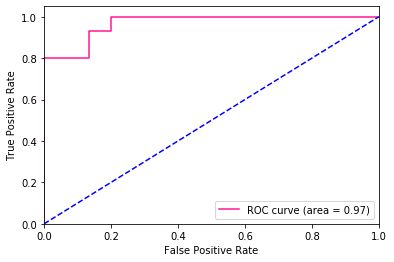

In [22]:
# Plotting the curve with 'training' values

plt.figure()
plt.plot(fpr, tpr, color = 'deeppink', label = 'ROC curve (area = %0.2f)' % roc_area)
plt.plot([0,1],[0,1], 'b--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc = "lower right")
plt.show()

In [23]:
fpr.astype(int)

array([0, 0, 0, 0, 0, 0, 0, 1])

In [24]:
tpr.astype(int)

array([0, 0, 0, 0, 0, 0, 1, 1])

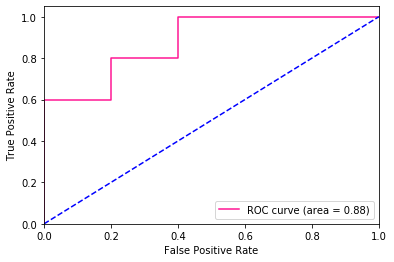

In [25]:
# Plotting OC curve with the 'test' values

log_ar = roc_auc_score(y_test, y_predict_test)
fpr1, tpr1, threshold1 = roc_curve(y_test, y_prob_test)
roc_ar = auc(fpr1, tpr1)
plt.figure()
plt.plot(fpr1, tpr1, color = 'deeppink', label = 'ROC curve (area = %0.2f)' % roc_ar)
plt.plot([0,1],[0,1], 'b--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc = "lower right")
plt.show()


In [26]:
# SETTING DIFFERENT THRESHHOLD VALUES FOR THE ROC CURVE

from sklearn.preprocessing import binarize 
y_predict_class = binarize(y_prob_test.reshape(1,-1), 0.35)[0]
y_predict_class

array([0., 0., 1., 1., 0., 0., 1., 1., 0., 1.])

In [27]:
# to convert these values into integer values
y_predict_class = y_predict_class.astype(int)
y_predict_class

array([0, 0, 1, 1, 0, 0, 1, 1, 0, 1])

In [28]:
confusion_matrix_new = skm.confusion_matrix(y_test, y_predict_class)
print(confusion_matrix_new)

[[4 1]
 [1 4]]


#### TO FIND THE FINAL OPTIMAL CUTOFF POINT (THRESHOLD VALUE) FOR ROC 

In [29]:
FPR , TPR , THRESHOLD = roc_curve(y_test, y_prob_test)
AUC_ROC = auc(FPR,TPR)
print("Area under the ROC curve: %f" % AUC_ROC)

Area under the ROC curve: 0.880000


In [30]:
import numpy as np
i = np.arange(len(TPR))
roc = pd.DataFrame({'FPR' : pd.Series(FPR, index = i), 'TPR': pd.Series(TPR, index = i), '1-FPR': pd.Series(1-FPR, index = i), 'TF': pd.Series(TPR - (1-FPR), index = i), 'Threshold': pd.Series(THRESHOLD, index = i)})
roc.iloc[(roc.TF-0).abs().argsort()[:1]]

,FPR,TPR,1-FPR,TF,Threshold
4,0.2,0.8,0.8,0.0,0.746702


[]

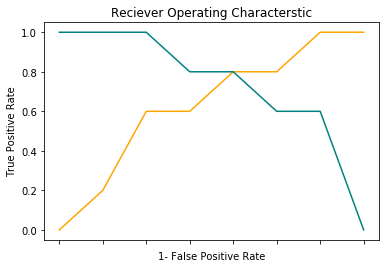

In [31]:
fig, ax = plt.subplots()
plt.plot(roc['TPR'], color = 'orange')
plt.plot(roc['1-FPR'], color = 'teal')
plt.xlabel('1- False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Reciever Operating Characterstic')
ax.set_xticklabels([])

### Drawing New ROC curve for the optimal cutoff value.

In [32]:
y_predict_newclass = binarize(y_prob_test.reshape(1,-1), 0.746702)[0]
y_predict_newclass.astype(int)

array([0, 0, 1, 1, 0, 0, 1, 1, 0, 1])

In [33]:
confusion_matrix_optimal = skm.confusion_matrix(y_test, y_predict_newclass)
print(confusion_matrix_optimal)

[[4 1]
 [1 4]]


In [34]:
print(classification_report(y_test, y_predict_newclass))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80         5
           1       0.80      0.80      0.80         5

    accuracy                           0.80        10
   macro avg       0.80      0.80      0.80        10
weighted avg       0.80      0.80      0.80        10

